# Plotting the energy balance model output

This notebook includes some basic plots you can use to inspect the energy balance model output. The output is a netcdf file so there are many ways you can visualize the data yourself, but I already created some basic plotting functions which are shown below.

In [1]:
%load_ext autoreload
%autoreload 2
from pebsi.processing.plotting_fxns import *
import xarray as xr

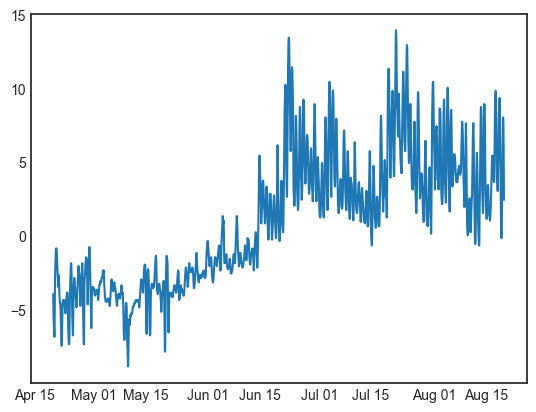

In [4]:
ds = xr.open_dataset('../Output/wolverineEC_2025_08_20_climate.nc')
fig, ax = plt.subplots()
import matplotlib as mpl
ax.plot(ds.time, ds.temp)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b %d'))

Open the file and do a quick inspection of the data variables contained within

In [ ]:
output_fn = '../Output/YOUR_FILE_NAME_HERE.nc'
ds = xr.open_dataset(output_fn)
ds

Visualize the snow layers for the duration of the model simulation

In [ ]:
# Define the variables to plot 
# Options: layertemp, layerdensity, layerwater, layergrainsize layerBC, layerOC, layerdust
layer_vars = ['layertemp','layerdensity','layerwater']

# Find the start and end timestamp
start = ds.time.values[0]
end = ds.time.values[-1]

# Create a daily timeseries to sample the model output
daily_dates = pd.date_range(start, end)

# Plot the layers
axes = visualize_layers(ds, daily_dates, layer_vars)
plt.show()

Inspect the heat fluxes averaged for each hour of the day

In [ ]:
# Group variable terms by subplot
hour_vars = [['SWnet','LWnet','sensible','latent','rain','ground'],
             ['melt','refreeze','accum','runoff']]

# Plot hourly averages of these terms
plot_hours(ds, hour_vars)

Plot any other single variable for the entire timeseries

In [ ]:
# Define the variable
var = 'albedo'

# Define the time range
time = [ds.time.values[0], ds.time.values[-1]]

# Define the time resolution
resolution = 'd'

# Make a simple plot
simple_plot(ds, time, [[var]], res=resolution)
plt.show()

If you are done early, feel free to play around with some other settings and see how it changes these plots!
Some easy things to change:
- Add a command line argument for the initial snow (e.g. -s0=3) or firn depth (e.g. -f0=10)
- Add a command line argument to turn off albedo switches 
    - Turn off grain size growth (-switch_melt=0)
    - Change albedo to be a simple exponential lapse rate (-switch_melt=1)
    - Turn off fresh snow albedo reset (-switch_snow=0)
    - Turn off light-absorbing particles (-switch_LAPs=0) will do nothing for the test glacier because it already has no LAPs

In [ ]:
# Define input filepaths of two simulations
output_fp_1 = ''
output_fp_2 = ''

# Choose variable to compare across datasets 
var = 'albedo'

# Open datasets 
ds1 = xr.open_dataset(output_fp_1)
ds2 = xr.open_dataset(output_fp_2)

# Determine start and end time
time = [ds1.time.values[0], ds1.time.values[-1]]

# Compare simulations 
fig,ax = compare_runs([ds1,ds2],time,['First simulation','Second simulation'],var)
plt.show()

More information on the dataset storage:

- 2 coordinates
   - time : hourly timestep values
   - layer : indices for the maximum number of layers the model can store (allows for large amounts of snowfall; most layers are empty)
- 36 data variables
   - mass balance terms
      - melt, refreeze, runoff, accumulation ("accum") and net mass balance ("MB") in m w.e.
      - snow depth ("snowdepth") and surface height change ("dh") in meters
      - cumrefreeze in m w.e.
          - tracks the cumulative refreeze which resets annually to 0 (allows accounting of annual internal mass balance)
    - energy balance terms
      - shortwave ("SW") and longwave ("LW") incoming ("in"), outgoing ("out"), and net ("net") fluxes in W m-2
      - SWin_sky and _terr in W m-2 
          - indicate the portion of incoming shortwave that is from the sky versus terrain-scattered
      - latent, sensible, ground, and rain heat fluxes in W m-2
      - meltenergy (sum of all other heat fluxes) in W m-2
      - surface temperature ("surftemp") in degrees C
      - other meteorological inputs: air temperature ("airtemp") in degrees C and wind speed ("wind") in m s-1
    - layer variables
      - temperature ("temp") in degrees C
      - density in kg m-3
      - liquid water content ("water") in masss %
      - grain size ("grainsize") in um
      - refrozen content in mm w.e. / kg m-2
      - black carbon ("BC"), organic carbon ("OC") and dust content in ppb
- several attributes
    - glacier name, elevation, site of the simulation
    - from_AWS : which variables came from the weather station dataset
    - which_AWS : which AWS those variables came from
    - from_reanalysis : which variables came from reanalysis data
    - which_reanalysis : which reanalysis dataset those variables came from
    - run_start and run_end : the simulation start and end timestamp
    - model_run_date : the day this simulation was performed
    - time_elapsed : how long it took to run this simulation
    - run_by : name of the machine that ran the code